In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [71]:
(x_train, y_train ), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
(x_train3d,y_train3d),(x_test3d,y_test3d) = tf.keras.datasets.fashion_mnist.load_data()

In [73]:
x_train3d.shape

(60000, 28, 28)

In [3]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

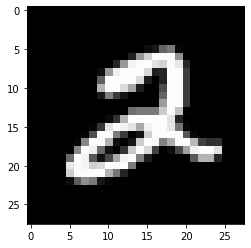

In [4]:
plt.imshow(x_train[5], cmap="gray")

In [5]:
## Preprocessing 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [44]:
from tensorflow.keras.utils import plot_model
def simpleAutoEncoder():
	encoder_input = tf.keras.layers.Input(shape=(28,28,1),name="encoder_input")
	nn = tf.keras.layers.Flatten()(encoder_input)
	nn = tf.keras.layers.Dense(256,activation=tf.nn.relu)(nn)
	encoder_output = tf.keras.layers.Dense(32,activation=tf.nn.relu,name="encoder_output")(nn)


	encoder = tf.keras.Model(encoder_input,encoder_output,name="encoder")

	decoder_input = tf.keras.layers.Dense(784,activation=tf.nn.relu)(encoder_output)
	decoder_output = tf.keras.layers.Reshape((28,28,1),name="decoder_output")(decoder_input)

	optimizer = tf.keras.optimizers.Adam(lr = 0.001)

	autoEncoder = tf.keras.Model(inputs=[encoder_input],outputs=[decoder_output])

	autoEncoder.compile(optimizer=optimizer,loss=tf.keras.losses.mean_squared_error,metrics=["mean_squared_error"])
	return autoEncoder,encoder

plot_model(simpleAutoEncoder()[0])
autoencoderModel,encoder = simpleAutoEncoder()
autoencoderModel.fit(x_train,x_train,validation_split= 0.1,epochs=10,batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 103us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2/10
54000/54000 [==============================] - 5s 89us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 3/10
54000/54000 [==============================] - 4s 79us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 4/10
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 5/10
54000/54000 [==============================] - 4s 73us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 6/10
54000/54000 [==============================] - 4s 76us/sample - loss: 0.0165 - mean_squared_er

In [8]:

print(f"Condensed To {32 / 784}")

Condensed To 0.04081632653061224


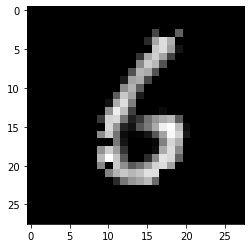

In [47]:
plt.imshow(autoencoderModel.predict(x_test[50].reshape(-1,28,28,1))[0],cmap="gray")

(28, 28)
(28, 28)


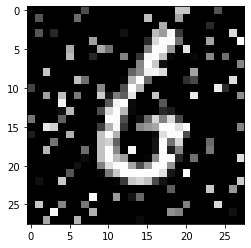

In [14]:
def add_noise(img):
	noisy = []
	print(img.shape)
	for row in img:
		new_pixel = []	
		for pixel in row:
			if np.random.choice( range(100)) <= 15:
				val = np.random.uniform(0, 1)
				new_pixel.append(val)
			else :
				new_pixel.append(pixel)
		noisy.append(new_pixel)
	noisy = np.array(noisy)
	print(noisy.shape)
	return noisy
noise_sample = add_noise(x_test[50].reshape(28,28))
plt.imshow(noise_sample,cmap="gray")

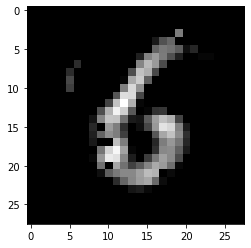

In [49]:
plt.imshow(autoencoderModel.predict(noise_sample.reshape(-1,28,28,1))[0],cmap="gray")

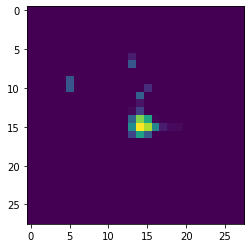

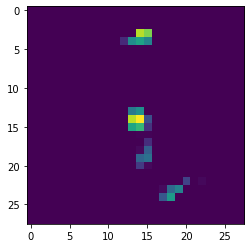

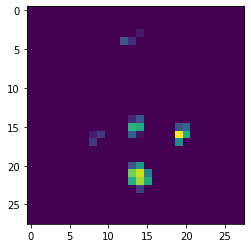

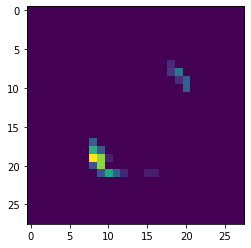

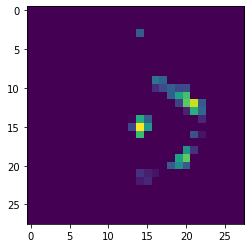

In [53]:
for i in range (5):
	plt.imshow(autoencoderModel.predict(np.random.normal(size=784).reshape(-1,28,28,1))[0])
	plt.show()

In [90]:
def AutoEncoderCNN():
		EPOCHS = 10

		encoder_input = tf.keras.layers.Input(shape=(28,28,1), name="encoder_input")
		layer = tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding="SAME")(encoder_input)
		layer = tf.keras.layers.MaxPool2D((2,2),padding="SAME")(layer)
		layer = tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding="SAME")(layer)
		layer = tf.keras.layers.MaxPool2D( (2,2) ,padding="SAME")(layer)
		layer = tf.keras.layers.Flatten()(layer)
		encoder_output = tf.keras.layers.Dense(512,activation=tf.nn.relu)(layer)

		encoder = tf.keras.Model(encoder_input, encoder_output,name="encoder")

		decoder_input =tf.keras.layers.Dense(1024, activation= tf.nn.relu)(encoder_output)

		layer = tf.keras.layers.Reshape((8,8,16))(decoder_input)
		layer = tf.keras.layers.Conv2D(32, (3,3),activation=tf.nn.relu,padding="SAME")(layer)
		layer = tf.keras.layers.MaxPool2D((2,2))(layer)
		layer = tf.keras.layers.Conv2D(32, (3,3),activation=tf.nn.relu,padding="SAME")(layer)
		layer = tf.keras.layers.MaxPool2D((2,2))(layer)		
		layer = tf.keras.layers.Flatten()(layer)
		layer = tf.keras.layers.Dense(784,activation=tf.nn.relu)(layer)
		decoder_output = tf.keras.layers.Reshape((28,28,1))(layer)

		autoEncoder = tf.keras.Model(encoder_input,decoder_output)

		autoEncoder.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="mse")

		return autoEncoder

autoEncoderCnn = AutoEncoderCNN()


In [92]:
autoEncoderCnn.fit(x_train.reshape(len(x_train),28,28,1),x_train,batch_size=64,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 94s 2ms/sample - loss: 1789.1805
Epoch 2/5
60000/60000 [==============================] - 94s 2ms/sample - loss: 1387.1336
Epoch 3/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 1311.2147
Epoch 4/5
60000/60000 [==============================] - 95s 2ms/sample - loss: 1273.3587
Epoch 5/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 1248.5224


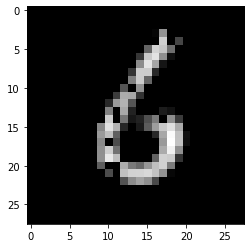

In [96]:
plt.imshow(autoEncoderCnn.predict(x_test[50].reshape(-1,28,28,1))[0],cmap="gray")